In [1]:
import numpy as np
from random import choice
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## **Ising Model – Theoretical Background**

The Ising model is one of the simplest theoretical frameworks that is used to study magnetic systems and phase transitions. Invented by Ernst Ising, it represents spins on a lattice that can either be "up" (+1) or "down" (-1).

### **1. Basic Parameters and Definitions**
- **Spin**: A quantum property of particles. In the context of the Ising model, it represents magnetic moments that can take two possible values (+1 or -1).
- **Lattice**: A regularly spaced array of points, where each point represents a spin.
- **Temperature (temp)**: The external temperature of the system, which influences the dynamics of the spins.

### **2. Energy in the Ising Model**

The energy of a particular configuration of spins in the Ising model is given by:
\[ E = -J \sum_{\langle i, j \rangle} S_i S_j \]
Where:
- \($ J $\) is the interaction strength between neighboring spins.
- \($ S_i $\) is the spin at site \($ i $\).
- The summation is over all nearest neighbors, \($\langle i, j \rangle$\).

If \($ J > 0 \$), the system prefers aligned spins (ferromagnetic), and if \($ J < 0 $\), it prefers opposite spins (antiferromagnetic).

### **3. Monte Carlo and Metropolis Algorithm**

The code uses the Metropolis algorithm, a Monte Carlo method, to evolve the spin system. The Metropolis algorithm follows these steps:

1. Randomly select a site on the lattice.
2. Compute the energy difference (\($ \Delta E $\)) if this spin were to be flipped.
3. If \($ \Delta E \leq 0 $\), flip the spin.
4. If \($ \Delta E > 0 $\), flip the spin with a probability \($ P = \exp(-\Delta E / k_B T) $\), where \($ k_B $\) is the Boltzmann constant and \($ T $\) is the temperature.

This process allows the system to explore different configurations and approach an equilibrium state over time.


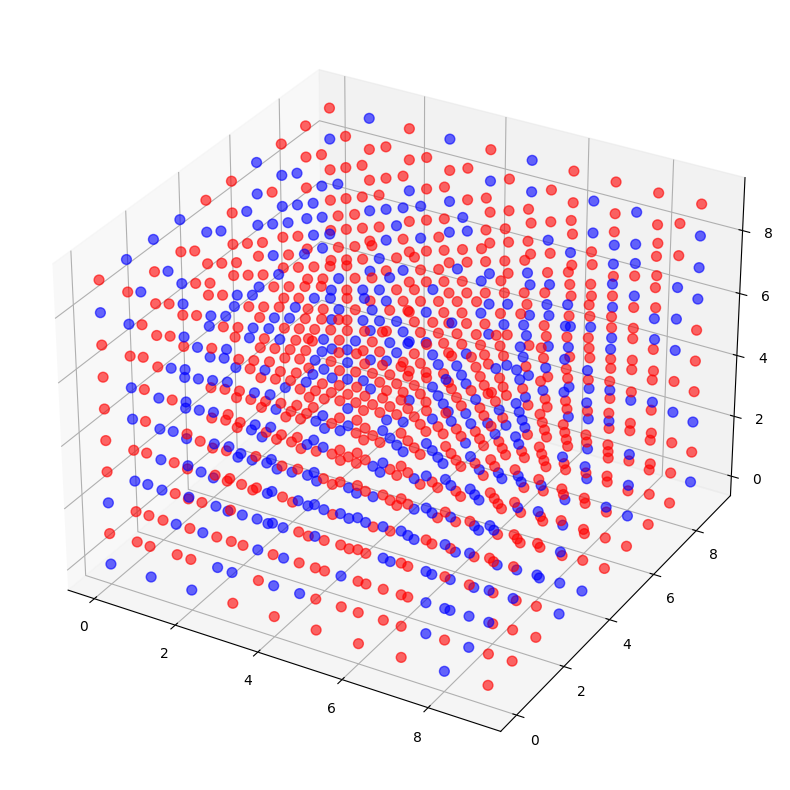

In [2]:
def map_to_lattice(index, size, dimension):
    if dimension == 1:
        return [index, 0, 0]
    if dimension == 2:
        x = index % size
        y = np.floor(index / size)
        return [x, y, 0]
    if dimension == 3:
        sub_index = index % (size**2)
        x = sub_index % size
        y = np.floor(sub_index / size)
        z = np.floor(index / size**2)
        return [x, y, z]

def map_to_array(array, size, dimension):
    if dimension == 1:
        return array[0]
    if dimension == 2:
        return array[0] + array[1] * size
    if dimension == 3:
        return array[0] + array[1] * size + array[2] * size * size

def nNbr(index, size, dimension):
    if dimension == 1:
        return [(index + size - 1) % size, (index + size + 1) % size]
    
    if dimension == 2:
        pos = map_to_lattice(index, size, dimension)
        north = np.mod(np.add(pos, [0, size + 1, 0]), size)
        south = np.mod(np.add(pos, [0, size - 1, 0]), size)
        east = np.mod(np.add(pos, [size + 1, 0, 0]), size)
        west = np.mod(np.add(pos, [size - 1, 0, 0]), size)
        return [map_to_array(north, size, 2), map_to_array(south, size, 2), map_to_array(east, size, 2), map_to_array(west, size, 2)]
    
    if dimension == 3:
        # Code for 3D
        pos = map_to_lattice(index, size, dimension)
        north = np.mod(np.add(pos, [0, size + 1, 0]), size)
        south = np.mod(np.add(pos, [0, size - 1, 0]), size)
        east = np.mod(np.add(pos, [size + 1, 0, 0]), size)
        west = np.mod(np.add(pos, [size - 1, 0, 0]), size)
        up = np.mod(np.add(pos, [0, 0, size + 1]), size)
        down = np.mod(np.add(pos, [0, 0, size - 1]), size)
        return [map_to_array(north, size, 3), map_to_array(south, size, 3), map_to_array(east, size, 3), map_to_array(west, size, 3), map_to_array(up, size, 3), map_to_array(down, size, 3)]

# Set up the system parameters
temp = 100
L = 10  # Reduced size for visual clarity
dims = 3
N = L**dims
kB = 8.617E-5
J = -10.0*kB
beta = 1/(temp*kB)
MaxIteration = 1000

spinV = np.empty(N, int)
Apos = [map_to_lattice(ii, L, dims) for ii in range(N)]
spinV.fill(1)

for ii in range(int(N/2)):
    kk = choice(range(N))
    spinV[kk] = -1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if spin == 1 else 'blue' for spin in spinV]
ax.scatter([pos[0] for pos in Apos], [pos[1] for pos in Apos], [pos[2] for pos in Apos], c=colors, s=50, alpha=0.6)

plt.show()


## **Self-Study Questions:**

1. What is the significance of the Ising model in the study of phase transitions?
2. How does the dimensionality of the lattice affect the behavior of the Ising model?
3. In the Metropolis algorithm, why is a spin flipped with a probability if \($ \Delta E > 0 $\)?
4. Explore the effects of temperature on the Ising model. How does increasing or decreasing the temperature affect the equilibrium state?
5. What happens if the interaction strength \($ J $\) is changed from ferromagnetic to antiferromagnetic?
6. How would you modify the code to incorporate an external magnetic field?
7. Dive deeper into Monte Carlo methods. How do they help in simulating physical systems?
8. Research other lattice models used to study magnetic systems or phase transitions. How do they differ from the Ising model?